## 第一课 神经网络和深度学习

### 2.11 向量化

In [5]:
import numpy as np

a = np.array([[1,2,3,4],
            [2,2,2,2]])
print(a.shape) 

(2, 4)


In [2]:
import time # 导入时间库
a = np.random.rand(1000000) # 通过round随机得到两个一百万维度的数组
b = np.random.rand(1000000)

# 向量化的版本
tic = time.time()
c = np.dot(a,b)
toc = time.time()

print(c)
print("Vectorized version:" + str(1000*(toc-tic)) + "ms")

# 非向量化版本
c = 0
tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()

print(c)
print("For loop:" + str(1000*(toc-tic)) + "ms")

249486.86794504005
Vectorized version:7.9803466796875ms
249486.86794503906
For loop:1187.8259181976318ms


### 2.15 Python 中的广播

In [3]:
import numpy as np

A = np.array([[56.0,0.0,4.4,68.0],
             [1.2,104.0,52.0,8.0],
             [1.8,135.0,99.0,0.9]])
print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [4]:
cal = A.sum(axis=0)
print(cal)

[ 59.  239.  155.4  76.9]


In [5]:
percentage = 100 * A / cal.reshape(1,4)
print(percentage)

[[94.91525424  0.          2.83140283 88.42652796]
 [ 2.03389831 43.51464435 33.46203346 10.40312094]
 [ 3.05084746 56.48535565 63.70656371  1.17035111]]


### 2.16 关于python_numpy向量的说明

In [6]:
import numpy as np

a = np.random.randn(5)

In [7]:
print(a)

[ 9.51817721e-04  5.03243530e-01 -2.35545772e+00  1.22050275e+00
  1.31398072e-01]


In [8]:
# 这是一个一维数组，它既不是行向量也不是一个列向量
# 不要使用这种数组的结构：(n,)
print(a.shape)

(5,)


In [9]:
print(a.T)

[ 9.51817721e-04  5.03243530e-01 -2.35545772e+00  1.22050275e+00
  1.31398072e-01]


In [10]:
print(np.dot(a, a.T))

7.3083284262067805


**要使用矩阵类型**:

In [11]:
a = np.random.randn(5,1) # 列向量
print(a)

[[ 1.15215186]
 [ 0.57275927]
 [ 0.17045242]
 [-0.59959572]
 [ 0.25800132]]


In [12]:
print(a.T)

[[ 1.15215186  0.57275927  0.17045242 -0.59959572  0.25800132]]


In [13]:
print(np.dot(a, a.T))

[[ 1.32745392  0.65990567  0.19638707 -0.69082533  0.2972567 ]
 [ 0.65990567  0.32805319  0.0976282  -0.34342401  0.14777265]
 [ 0.19638707  0.0976282   0.02905403 -0.10220254  0.04397695]
 [-0.69082533 -0.34342401 -0.10220254  0.35951503 -0.15469649]
 [ 0.2972567   0.14777265  0.04397695 -0.15469649  0.06656468]]


In [14]:
assert(a.shape == (5,1))

### 4.6 前向和反向传播

**前向传播**
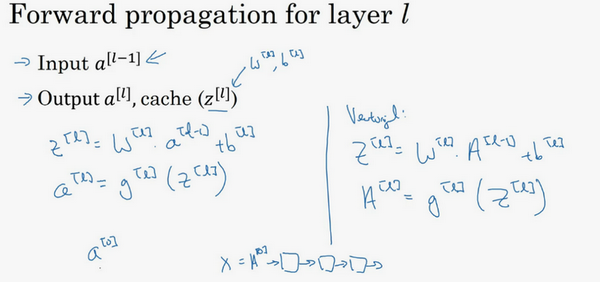

---
前向传播的步骤可以写成：

$z^{[l]}=W^{[l]} * a^{[l - 1]} + b^{[l]}$

$a^{[l]}=g^{[l]}(z^{[l]})$

向量化实现过程可以写成:

$Z^{[l]}=W^{[l]}*A{[l - 1]} + b^{[l]}$

$A^{[l]} = g^{[l]}(Z^{[l]})$

**反向传播**
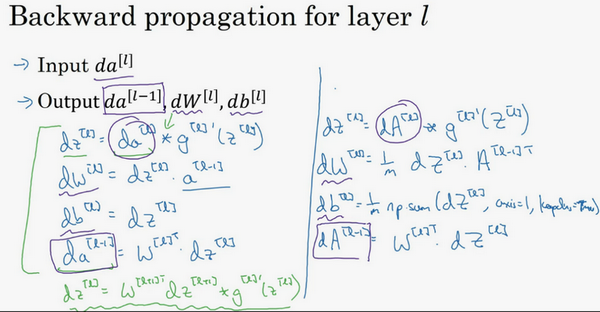
反向传播的步骤可以写成：

（1）$dz^{[l]} = da^{[l]} * g^{[l]'}(z^{[l]})$

（2）$dw^{[l]} = dz^{[l]} * a^{[l - 1]}$

（3）$db^{[l]} = dz^{[l]}$

（4）$da^{[l - 1]} = w^{[l]T}*dz^{[l]}$

---

向量化实现过程可以写成：

（1）$dZ^{[l]} = dA^{[l]} * g^{[l]'}(Z^{[l]})$

（2）$dW^{[l]} = \frac{1}{m} dZ^{[l]} * A^{[l - 1]T}$

（3）$db^{[l]} = \frac{1}{m} np.sum(dz^{[l]}, axis = 1, keepdims = True)$

（4）$dA^{[l - 1]} = W^{[l]T}*dZ^{[l]}$